Data source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Understanding the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from xgboost import XGBClassifier

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, recall_score

In [ ]:
import itertools

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory data analysis

### 1. Check missing value

In [ ]:
df.isnull().values.any()

False

### 2. Data distribution/imbalance

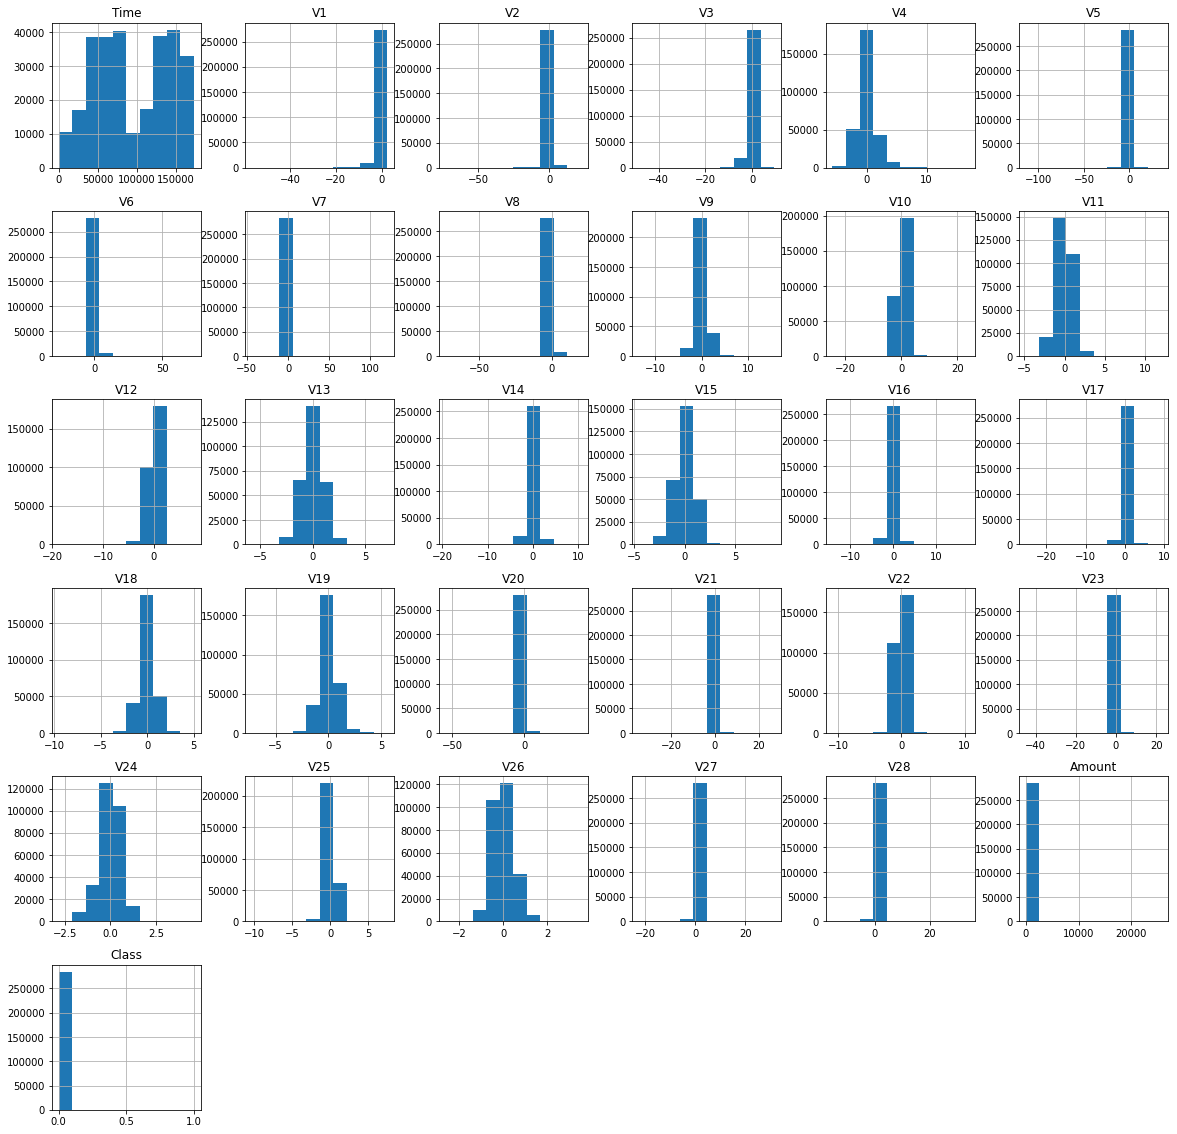

In [ ]:
df.hist(figsize = (20, 20))
plt.show()

First check with transaction **Class**.

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#pct for norm:
df['Class'].value_counts()[0]/df['Class'].count()*100

99.82725143693798

In [ ]:
#pct for fraud:
df['Class'].value_counts()[1]/df['Class'].count()*100

0.1727485630620034

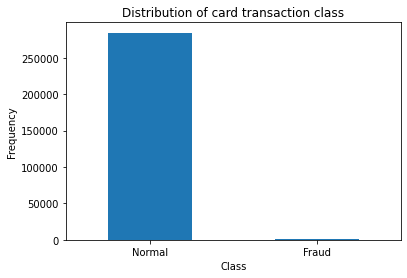

In [ ]:
pd.value_counts(df['Class'], sort = True).plot(kind = 'bar', rot=0)
plt.title('Distribution of card transaction class')
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show();

In [ ]:
norm = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

As you can see, most of data records are normal ones. Though it's consistent with our common sense, this distribution represents an obviously imbalanced dataset.

Now check with **Time** distribution for two classes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


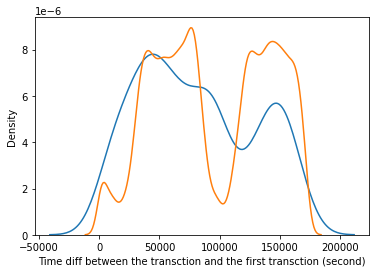

In [ ]:
ax = sns.distplot(fraud['Time'],label='Fraud', hist=False)
ax = sns.distplot(norm['Time'],label='Normal', hist=False)
ax.set(xlabel='Time diff between the transction and the first transction (second)')
plt.show();

Seems like Time is not an influential factor for normal and fraud transactions - we could simply delete this column!

In [ ]:
df.drop('Time', axis = 1, inplace = True)

Now check with **Amount** distribution for two classes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


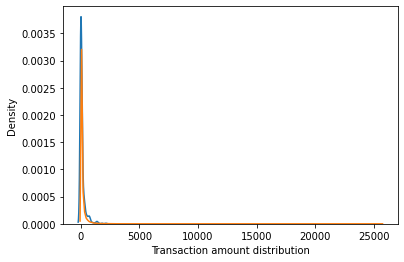

In [ ]:
ax = sns.distplot(fraud['Amount'],label='Fraud', hist=False)
ax = sns.distplot(norm['Amount'],label='Normal', hist=False)
ax.set(xlabel='Transaction amount distribution')
plt.show();

For normal transactions, the transaction amount spreads in a wide range; while for fraud ones,the amount densed in tiny amount.

### 3. Data scaling

First we try to standardize the Amount variable and drop the initial one.

In [ ]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))

### 4. Split data

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Modeling

In [ ]:
performance = pd.DataFrame(columns=['Model Name','Accuracy score','F1 score'],) 

### Logistic Regression

In [ ]:
m_lr = LogisticRegression()
m_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = m_lr.predict(X_test)

In [ ]:
acc_lr = accuracy_score(y_test, y_pred_lr)

In [ ]:
f1_lr = f1_score(y_test, y_pred_lr)

In [ ]:
confusion_matrix(y_test, y_pred_lr, labels = [0, 1])

array([[85284,    12],
       [   56,    91]])

In [ ]:
newResult = {'Model Name':'Logistic Regression','Accuracy score':acc_lr,'F1 score':f1_lr} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.999204,0.728


### KNearestNeighbor

In [ ]:
n=5
m_knn = KNeighborsClassifier(n_neighbors=n)
m_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = m_knn.predict(X_test)

In [ ]:
acc_knn = accuracy_score(y_test, y_pred_knn)

In [ ]:
f1_knn = f1_score(y_test, y_pred_knn)

In [ ]:
newResult = {'Model Name':'KNN','Accuracy score':acc_knn,'F1 score':f1_knn} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.999204,0.728000
1,KNN,0.999438,0.815385


### Decision Tree

In [ ]:
m_dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
m_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred_dt = m_dt.predict(X_test)

In [ ]:
acc_dt = accuracy_score(y_test, y_pred_dt)

In [ ]:
f1_dt = f1_score(y_test, y_pred_dt)

In [ ]:
confusion_matrix(y_test, y_pred_dt, labels = [0, 1])

array([[85277,    19],
       [   35,   112]])

In [ ]:
newResult = {'Model Name':'Decision Tree','Accuracy score':acc_dt,'F1 score':f1_dt} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.999204,0.728000
1,KNN,0.999438,0.815385
2,Decision Tree,0.999368,0.805755


### Random Forest

In [ ]:
m_rf = RandomForestClassifier(max_depth = 4)
m_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
y_pred_rf = m_rf.predict(X_test)

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
f1_rf = f1_score(y_test, y_pred_rf)

In [ ]:
confusion_matrix(y_test, y_pred_rf, labels = [0, 1])

array([[85286,    10],
       [   48,    99]])

In [ ]:
newResult = {'Model Name':'Random Forest','Accuracy score':acc_rf,'F1 score':f1_rf} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.999204,0.728000
1,KNN,0.999438,0.815385
2,Decision Tree,0.999368,0.805755
3,Random Forest,0.999321,0.773438


### SVM

In [ ]:
m_svm = SVC()
m_svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm = m_svm.predict(X_test)

In [ ]:
acc_svm = accuracy_score(y_test, y_pred_svm)

In [ ]:
f1_svm = f1_score(y_test, y_pred_svm)

In [ ]:
newResult = {'Model Name':'SVM','Accuracy score':acc_svm,'F1 score':f1_svm} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.999204,0.728000
1,KNN,0.999438,0.815385
2,Decision Tree,0.999368,0.805755
3,Random Forest,0.999321,0.773438
4,SVM,0.999345,0.774194


### XGBoost

In [ ]:
m_xgb = XGBClassifier(max_depth = 4)
m_xgb.fit(X_train, y_train)

XGBClassifier(max_depth=4)

In [ ]:
y_pred_xgb = m_xgb.predict(X_test)

In [ ]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)

In [ ]:
f1_xgb = f1_score(y_test, y_pred_xgb)

In [ ]:
newResult = {'Model Name':'XGBoost','Accuracy score':acc_xgb,'F1 score':f1_xgb} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.999204,0.728000
1,KNN,0.999438,0.815385
2,Decision Tree,0.999368,0.805755
3,Random Forest,0.999321,0.773438
4,SVM,0.999345,0.774194
5,XGBoost,0.999497,0.840149


Obviously, XGBoost is the best performer!

# Cope with imbalanced dataset with Undersampling

In [ ]:
Counter(y_train)

Counter({0: 199019, 1: 345})

In [ ]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_rus)

Counter({0: 345, 1: 345})

# Modeling on balanced data after undersampling

### Logistic regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=0)
# Specify params
parameters = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
# Specifing score as roc-auc
m_cv_lr = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = parameters, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
# Fit the model
m_cv_lr.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

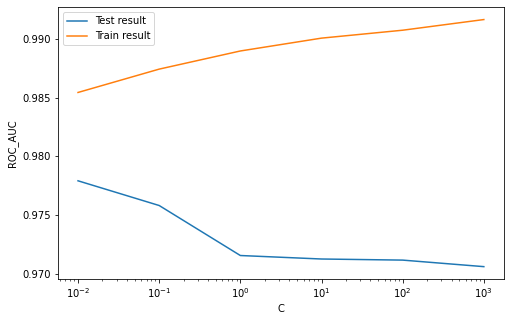

In [ ]:
cv_results = pd.DataFrame(m_cv_lr.cv_results_)

# plot of C versus train and validation scores
plt.figure(figsize=(8, 5))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('ROC_AUC')
plt.legend(['Test result', 'Train result'], loc='upper left')
plt.xscale('log');

In [ ]:
# Best score with best C
best_score = m_cv_lr.best_score_
best_C = m_cv_lr.best_params_['C']
print(" The highest test ROC_AUC is {0} at C = {1}".format(best_score, best_C))

 The highest test ROC_AUC is 0.9779176425152374 at C = 0.01


In [ ]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

Predictions on the train set

In [ ]:
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [ ]:
accuracy_train = accuracy_score(y_train_rus, y_train_pred)
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
sensitivity_train = TP / float(TP+FN)
specificity_train = TN / float(TN+FP)

[[339   6]
 [ 31 314]]


In [ ]:
perf_undersampling = pd.DataFrame(columns=['Dataset','Accuracy score','Sensitivity','Specificity'],) 
result = {'Dataset':'LR_train','Accuracy score':accuracy_train,'Sensitivity':sensitivity_train,'Specificity':specificity_train} 
perf_undersampling = perf_undersampling.append(result,ignore_index = True)
perf_undersampling

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.946377,0.910145,0.982609


In [ ]:
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
metrics.roc_auc_score(y_train_rus, y_train_pred_proba)

0.986507036336904

In [ ]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

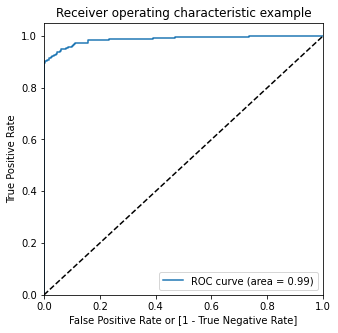

In [ ]:
draw_roc(y_train_rus, y_train_pred_proba)

Predictions on the test set

In [ ]:
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
sensitivity_test = TP / float(TP+FN)
specificity_test = TN / float(TN+FP)

[[83326  1970]
 [   13   134]]


In [ ]:
result = {'Dataset':'LR_test','Accuracy score':accuracy_test,'Sensitivity':sensitivity_test,'Specificity':specificity_test} 
perf_undersampling = perf_undersampling.append(result,ignore_index = True)
perf_undersampling

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.946377,0.910145,0.982609
1,LR_test,0.976792,0.911565,0.976904


In [ ]:
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9812496889583069

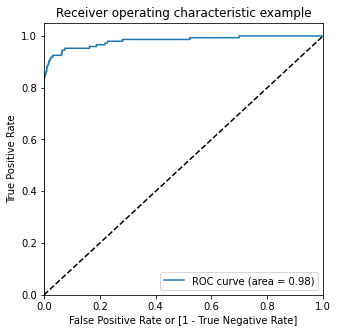

In [ ]:
draw_roc(y_test, y_test_pred_proba)

### Decision tree

In [ ]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9633018273471959
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [ ]:
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Prediction on the train set

In [ ]:
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [ ]:
accuracy_train = accuracy_score(y_train_rus, y_train_pred)
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 
sensitivity_train = TP / float(TP+FN)
specificity_train = TN / float(TN+FP)

[[345   0]
 [  0 345]]


In [ ]:
result = {'Dataset':'DT_train','Accuracy score':accuracy_train,'Sensitivity':sensitivity_train,'Specificity':specificity_train} 
perf_undersampling = perf_undersampling.append(result,ignore_index = True)
perf_undersampling

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.946377,0.910145,0.982609
1,LR_test,0.976792,0.911565,0.976904
2,DT_train,0.924638,1.000000,1.000000


In [ ]:
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]
metrics.roc_auc_score(y_train_rus, y_train_pred_proba)

0.9783868935097668

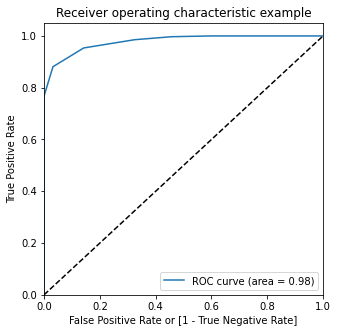

In [ ]:
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [ ]:
y_test_pred = dt_bal_rus_model.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 
sensitivity_test = TP / float(TP+FN)
specificity_test = TN / float(TN+FP)

[[82822  2474]
 [   22   125]]


In [ ]:
result = {'Dataset':'DT_test','Accuracy score':accuracy_test,'Sensitivity':sensitivity_test,'Specificity':specificity_test} 
perf_undersampling = perf_undersampling.append(result,ignore_index = True)
perf_undersampling

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.946377,0.910145,0.982609
1,LR_test,0.976792,0.911565,0.976904
2,DT_train,0.924638,1.000000,1.000000
3,DT_test,0.970788,0.850340,0.970995


In [ ]:
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9645259740549756

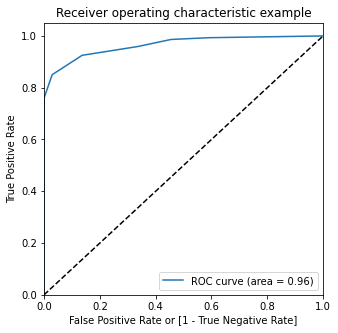

In [ ]:
draw_roc(y_test, y_test_pred_proba)

### Random forest

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9741228659766097 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [ ]:
rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

Prediction on the train set

In [ ]:
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [ ]:
accuracy_train = accuracy_score(y_train_rus, y_train_pred)
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 
sensitivity_train = TP / float(TP+FN)
specificity_train = TN / float(TN+FP)

[[345   0]
 [  0 345]]


In [ ]:
result = {'Dataset':'RF_train','Accuracy score':accuracy_train,'Sensitivity':sensitivity_train,'Specificity':specificity_train} 
perf_undersampling = perf_undersampling.append(result,ignore_index = True)
perf_undersampling

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.946377,0.910145,0.982609
1,LR_test,0.976792,0.911565,0.976904
2,DT_train,0.924638,1.000000,1.000000
3,DT_test,0.970788,0.850340,0.970995
4,RF_train,0.934783,1.000000,1.000000


In [ ]:
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]
metrics.roc_auc_score(y_train_rus, y_train_pred_proba)

0.9850619617727369

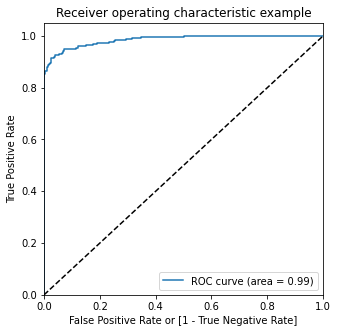

In [ ]:
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [ ]:
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 
sensitivity_test = TP / float(TP+FN)
specificity_test = TN / float(TN+FP)

[[84079  1217]
 [   19   128]]


In [ ]:
result = {'Dataset':'RF_test','Accuracy score':accuracy_test,'Sensitivity':sensitivity_test,'Specificity':specificity_test} 
perf_undersampling = perf_undersampling.append(result,ignore_index = True)
perf_undersampling

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.946377,0.910145,0.982609
1,LR_test,0.976792,0.911565,0.976904
2,DT_train,0.924638,1.000000,1.000000
3,DT_test,0.970788,0.850340,0.970995
4,RF_train,0.934783,1.000000,1.000000
5,RF_test,0.985534,0.870748,0.985732


### XGBoost

In [ ]:
# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)
# set up GridSearchCV()
m_cv_xgb = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
# fit the model
m_cv_xgb.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

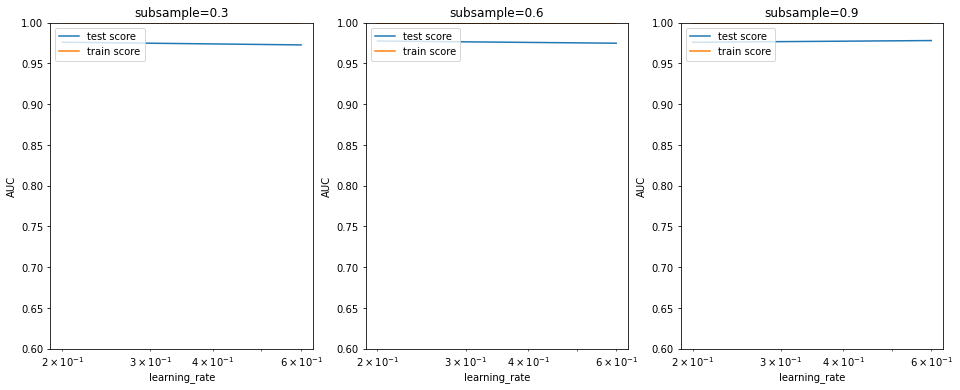

In [ ]:
cv_results = pd.DataFrame(m_cv_xgb.cv_results_)
plt.figure(figsize=(16,6))
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 
for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]
    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
m_cv_xgb.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

Prediction on the train set

In [ ]:
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [ ]:
accuracy_train = accuracy_score(y_train_rus, y_train_pred)
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 
sensitivity_train = TP / float(TP+FN)
specificity_train = TN / float(TN+FP)

[[345   0]
 [  0 345]]


In [ ]:
result = {'Dataset':'XGB_train','Accuracy score':accuracy_train,'Sensitivity':sensitivity_train,'Specificity':specificity_train} 
perf_undersampling = perf_undersampling.append(result,ignore_index = True)
perf_undersampling

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.946377,0.910145,0.982609
1,LR_test,0.976792,0.911565,0.976904
2,DT_train,0.924638,1.000000,1.000000
3,DT_test,0.970788,0.850340,0.970995
4,RF_train,0.934783,1.000000,1.000000
5,RF_test,0.985534,0.870748,0.985732
6,DT_train,1.000000,1.000000,1.000000
7,XGB_train,1.000000,1.000000,1.000000


In [ ]:
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
metrics.roc_auc_score(y_train_rus, y_train_pred_proba)

1.0

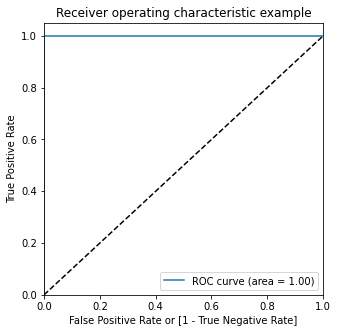

In [ ]:
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [ ]:
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 
sensitivity_test = TP / float(TP+FN)
specificity_test = TN / float(TN+FP)

[[83105  2191]
 [   13   134]]


In [ ]:
result = {'Dataset':'XGB_test','Accuracy score':accuracy_test,'Sensitivity':sensitivity_test,'Specificity':specificity_test} 
perf_undersampling = perf_undersampling.append(result,ignore_index = True)
perf_undersampling

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.946377,0.910145,0.982609
1,LR_test,0.976792,0.911565,0.976904
2,DT_train,0.924638,1.000000,1.000000
3,DT_test,0.970788,0.850340,0.970995
4,RF_train,0.934783,1.000000,1.000000
5,RF_test,0.985534,0.870748,0.985732
6,DT_train,1.000000,1.000000,1.000000
7,XGB_train,1.000000,1.000000,1.000000
8,XGB_test,0.974205,0.911565,0.974313


# Modeling on balanced data after SMOTE

In [ ]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
#before SMOTE
X_train.shape

(199364, 29)

In [ ]:
#after SMOTE
X_train_smote.shape

(398038, 29)

### Logistic regression

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)

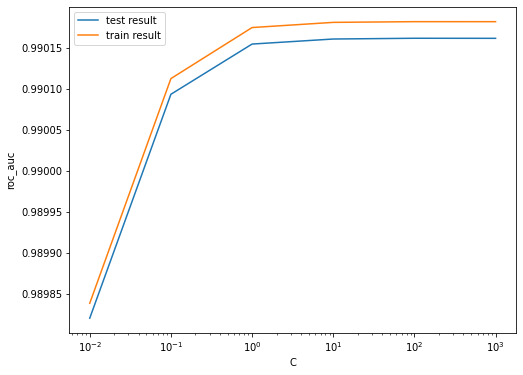

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
logistic_bal_smote = LogisticRegression(C=0.1)
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

Prediction on the train set

In [ ]:
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [ ]:
accuracy_train = accuracy_score(y_train_smote, y_train_pred)
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]
sensitivity_train = TP / float(TP+FN)
specificity_train = TN / float(TN+FP)

[[193993   5026]
 [ 16832 182187]]


In [ ]:
perf_SMOTE = pd.DataFrame(columns=['Dataset','Accuracy score','Sensitivity','Specificity'],) 
result = {'Dataset':'LR_train','Accuracy score':accuracy_train,'Sensitivity':sensitivity_train,'Specificity':specificity_train} 
perf_SMOTE = perf_SMOTE.append(result,ignore_index = True)
perf_SMOTE

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.945086,0.915425,0.974746


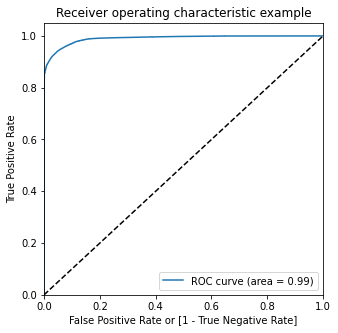

In [ ]:
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

Prediction on the test set

In [ ]:
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]
sensitivity_test = TP / float(TP+FN)
specificity_test = TN / float(TN+FP)

[[83201  2095]
 [   12   135]]


In [ ]:
result = {'Dataset':'LR_test','Accuracy score':accuracy_train,'Sensitivity':sensitivity_train,'Specificity':specificity_train} 
perf_SMOTE = perf_SMOTE.append(result,ignore_index = True)
perf_SMOTE

,Dataset,Accuracy score,Sensitivity,Specificity
0,LR_train,0.945086,0.915425,0.974746
1,LR_test,0.945086,0.915425,0.974746


### Decision tree

In [197]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [198]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,12.258030,0.995107,0.082862,0.004565,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987943,0.988555,0.988218,0.988239,0.000250,5
1,15.203304,2.008713,0.125496,0.051372,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.987941,0.988555,0.988218,0.988238,0.000251,6
2,11.567889,1.392312,0.075761,0.014678,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987907,0.988570,0.988201,0.988226,0.000271,8
3,9.907098,1.986649,0.061152,0.009372,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.987910,0.988570,0.988201,0.988227,0.000270,7
4,13.484721,0.317413,0.058373,0.000473,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997936,0.998029,0.998031,0.997999,0.000044,2
5,13.674876,0.339543,0.057786,0.000329,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997960,0.998009,0.998099,0.998023,0.000058,1
6,13.427772,0.302143,0.057914,0.000187,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997853,0.997919,0.998001,0.997924,0.000061,3
7,13.405156,0.280038,0.059584,0.000985,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997889,0.997876,0.997973,0.997913,0.000043,4


In [199]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980228661855954
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [200]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

Prediction on the train set

In [201]:
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [202]:
accuracy_train = accuracy_score(y_train_smote, y_train_pred)
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]
sensitivity_train = TP / float(TP+FN)
specificity_train = TN / float(TN+FP)

[[196700   2319]
 [  1882 197137]]


In [203]:
result = {'Dataset':'DT_train','Accuracy score':accuracy_train,'Sensitivity':sensitivity_train,'Specificity':specificity_train} 
perf_SMOTE = perf_SMOTE.append(result,ignore_index = True)
perf_SMOTE

,Dataset,Accuracy score,Sensitivity,Specificity
0,DT_train,0.989446,0.990544,0.988348


In [204]:
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]
metrics.roc_auc_score(y_train_smote, y_train_pred_proba)

0.9987249155488227

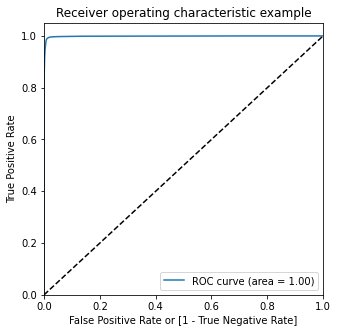

In [205]:
draw_roc(y_train_smote, y_train_pred_proba)

Prediction on the test set

In [206]:
y_test_pred = dt_bal_smote_model.predict(X_test)

In [207]:
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]
sensitivity_test = TP / float(TP+FN)
specificity_test = TN / float(TN+FP)

[[84248  1048]
 [   21   126]]


In [211]:
result = {'Dataset':'DT_test','Accuracy score':accuracy_test,'Sensitivity':sensitivity_test,'Specificity':specificity_test} 
perf_SMOTE = perf_SMOTE.append(result,ignore_index = True)
perf_SMOTE

,Dataset,Accuracy score,Sensitivity,Specificity
0,DT_train,0.989446,0.990544,0.988348
1,DT_test,0.989446,0.990544,0.988348
2,DT_test,0.987489,0.857143,0.987713


In [209]:
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9048701313202075

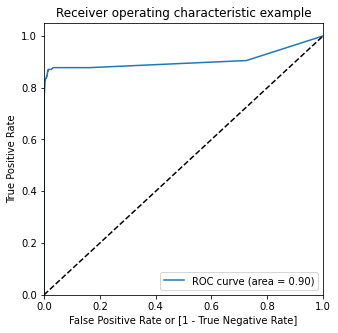

In [210]:
draw_roc(y_test, y_test_pred_proba)

### XGBoost

In [ ]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

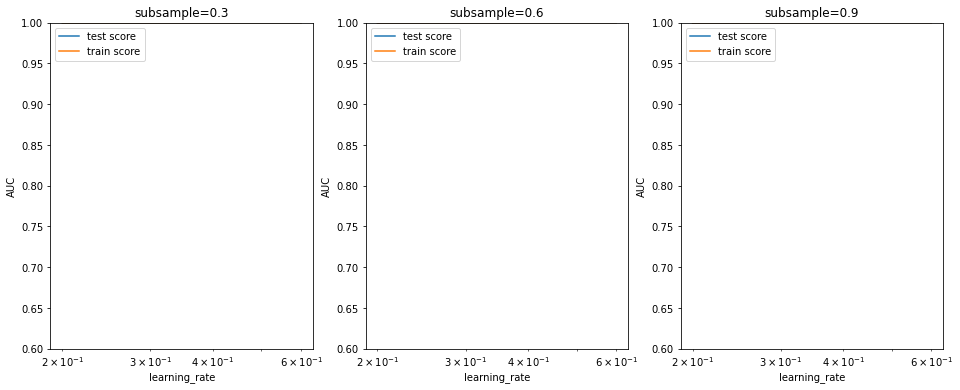

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

Prediction on the train set

In [ ]:
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [ ]:
accuracy_train = accuracy_score(y_train_smote, y_train_pred)
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]
sensitivity_train = TP / float(TP+FN)
specificity_train = TN / float(TN+FP)

[[197036   1983]
 [  3701 195318]]


In [ ]:
result = {'Dataset':'XGB_train','Accuracy score':accuracy_train,'Sensitivity':sensitivity_train,'Specificity':specificity_train} 
perf_SMOTE = perf_SMOTE.append(result,ignore_index = True)
perf_SMOTE

,Dataset,Accuracy score,Sensitivity,Specificity
0,XGB_train,0.98572,0.981404,0.990036


In [ ]:
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]
metrics.roc_auc_score(y_train_smote, y_train_pred_proba)

0.9990594549693457

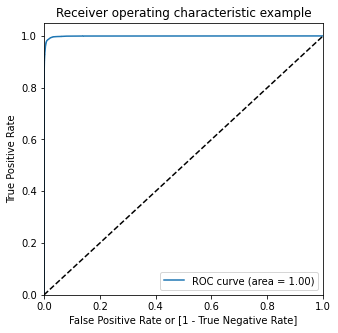

In [ ]:
draw_roc(y_train_smote, y_train_pred_proba)

Prediction on the test set

In [ ]:
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]
sensitivity_test = TP / float(TP+FN)
specificity_test = TN / float(TN+FP)

[[84503   793]
 [   18   129]]


In [ ]:
result = {'Dataset':'XGB_test','Accuracy score':accuracy_train,'Sensitivity':sensitivity_train,'Specificity':specificity_train} 
perf_SMOTE = perf_SMOTE.append(result,ignore_index = True)
perf_SMOTE

,Dataset,Accuracy score,Sensitivity,Specificity
0,XGB_train,0.98572,0.981404,0.990036
1,XGB_test,0.98572,0.981404,0.990036


In [ ]:
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_test_pred_proba)

0.9724748837820628

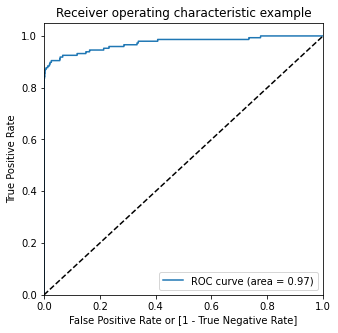

In [ ]:
draw_roc(y_test, y_test_pred_proba)

SMOTE is proven to be an effective method for imbalanced dataset and Decision Tree performs best in terms of accuracy level.

# Reference:

1. [Credit Fraud || Dealing with Imbalanced Datasets](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook)

2. [zmzhou_creditcard_fraud_detection](https://github.com/zmzhouXJTU/CreditCard_Fraud_Detection/blob/master/Creditcard_fraud_detection.py)

3. [sahidul-shaikh_creditcard_fraud_detection](https://github.com/sahidul-shaikh/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb)
